In [1]:
using Plots
theme(:dracula)

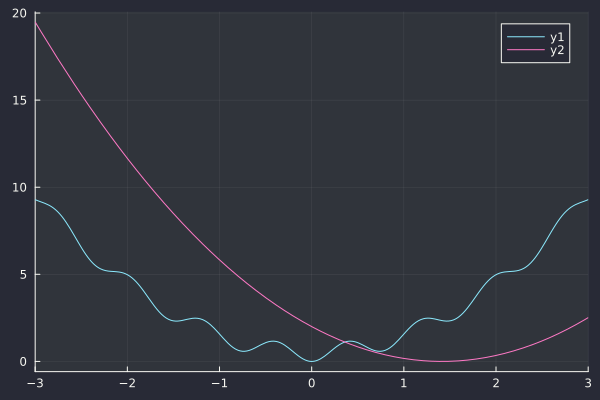

In [2]:
# bumpy quadratic
bump_coef = 1.
ω = 4
ℒ(x) = x^2 + bump_coef*sin(ω*x)^2
g(x) = 2x + bump_coef*2ω*sin(ω*x)cos(ω*x)

# coarse loss function
biasc = √2
ℒ_c(x) = (x-biasc)^2
g_c(x) = 2(x-biasc)

plot(ℒ; xlim=[-3, 3])
plot!(ℒ_c)

In [3]:
η = 0.01 # fine step size
ηc = 0.1 # coarse step size
x0 = 2.5 # starting point

xlims = [-abs(x0)-.5, abs(x0)+.5]
ylims = [-.1ℒ(x0), ℒ(x0) + 1]

2-element Vector{Float64}:
 -0.6545958969093304
  7.545958969093304

┌ Info: Saved animation to /var/folders/zv/yhkdrp5x48j5kr2txkz3mbtm002nnd/T/jl_wRIF0HUpEL.gif
└ @ Plots /Users/davarga/.julia/packages/Plots/8ZnR3/src/animation.jl:156


Plots.AnimatedGif("/var/folders/zv/yhkdrp5x48j5kr2txkz3mbtm002nnd/T/jl_wRIF0HUpEL.gif")
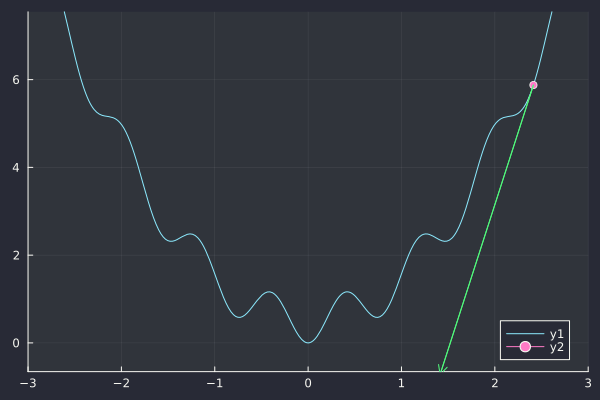

In [4]:
# grad descent
niters = 100
x = x0
grad_gd = zeros(niters+1)
loss_gd = zeros(niters+1)
grad_gd[1] = g(x0)
loss_gd[1] = ℒ(x0)

@gif for i ∈ 2:niters+1
    global x -= η*g(x)
    plot(ℒ; xlim=xlims, ylim=ylims)
    plot!((x, ℒ(x)); markershape=:circle)
    grad_gd[i] = g(x) + 1e-16
    loss_gd[i] = ℒ(x) + 1e-16
    quiver!([x], [ℒ(x)], quiver=([-1], [-g(x)]))
end
# plot)

┌ Info: Saved animation to /var/folders/zv/yhkdrp5x48j5kr2txkz3mbtm002nnd/T/jl_KpmjUVmZAf.gif
└ @ Plots /Users/davarga/.julia/packages/Plots/8ZnR3/src/animation.jl:156


Plots.AnimatedGif("/var/folders/zv/yhkdrp5x48j5kr2txkz3mbtm002nnd/T/jl_KpmjUVmZAf.gif")
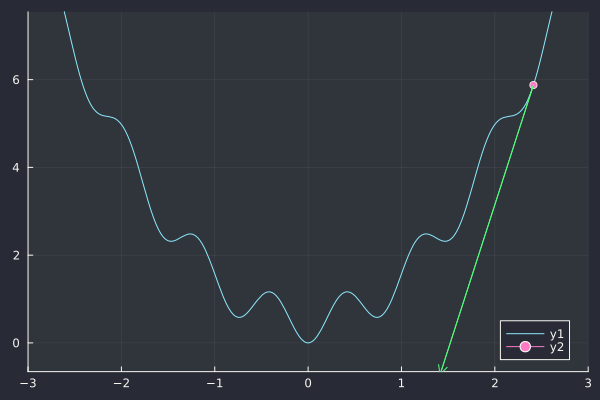

In [5]:
# grad descent (with momentum)
niters = 100
γ = 0.9 # inertia
x = x0
m = 0.
grad_gdm = zeros(niters+1)
loss_gdm = zeros(niters+1)
grad_gdm[1] = g(x0)
loss_gdm[1] = ℒ(x0)

@gif for i ∈ 2:niters+1
    global m = γ*m - η*g(x)
    global x += m
    grad_gdm[i] = g(x)
    loss_gdm[i] = ℒ(x)
    plot(ℒ; xlim=xlims, ylim=ylims)
    plot!((x, ℒ(x)); markershape=:circle)
    quiver!([x], [ℒ(x)], quiver=([-1], [-g(x)]))
end
# plot)

┌ Info: Saved animation to /var/folders/zv/yhkdrp5x48j5kr2txkz3mbtm002nnd/T/jl_8VG7q7Qvaf.gif
└ @ Plots /Users/davarga/.julia/packages/Plots/8ZnR3/src/animation.jl:156


Plots.AnimatedGif("/var/folders/zv/yhkdrp5x48j5kr2txkz3mbtm002nnd/T/jl_8VG7q7Qvaf.gif")
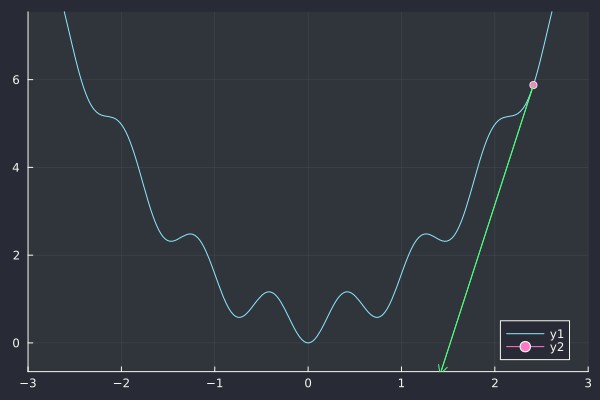

In [6]:
# grad descent (with Nesterov accel.)
niters = 100
γ = 0.9 # inertia

m = 0.
x = x0
grad_gdn = zeros(niters+1)
loss_gdn = zeros(niters+1)
grad_gdn[1] = g(x0)
loss_gdn[1] = ℒ(x0)

@gif for i ∈ 2:niters+1
    global m = γ*m - η*g(x + γ*m)
    global x += m
    grad_gdn[i] = g(x) + 1e-16
    loss_gdn[i] = ℒ(x) + 1e-16
    plot(ℒ; xlim=xlims, ylim=ylims)
    plot!((x, ℒ(x)); markershape=:circle)
    quiver!([x], [ℒ(x)], quiver=([-sign(g(x))], [-abs(g(x))]))
end
# plot)

┌ Info: Saved animation to /var/folders/zv/yhkdrp5x48j5kr2txkz3mbtm002nnd/T/jl_WhOnuhs3UB.gif
└ @ Plots /Users/davarga/.julia/packages/Plots/8ZnR3/src/animation.jl:156


Plots.AnimatedGif("/var/folders/zv/yhkdrp5x48j5kr2txkz3mbtm002nnd/T/jl_WhOnuhs3UB.gif")
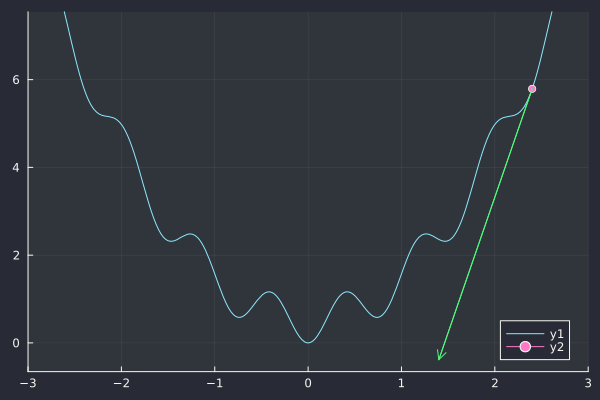

In [7]:
# Adam
niters = 100
γ1 = 0.9
γ2 = 0.999

v1 = 0.
v2 = 0.

x = x0
grad_adm = zeros(niters+1)
loss_adm = zeros(niters+1)
grad_adm[1] = g(x0)
loss_adm[1] = ℒ(x0)

@gif for i ∈ 2:niters+1
    global v1 = γ1*v1 + (1 - γ1)*g(x)
    global v2 = γ2*v2 + (1 - γ2)*(g(x))^2
    global x -= 10η*(v1/(1-γ1^(i-1)) / sqrt(v2/(1-γ2^(i-1))))
    grad_adm[i] = g(x) + 1e-16
    loss_adm[i] = ℒ(x) + 1e-16
    plot(ℒ; xlim=xlims, ylim=ylims)
    plot!((x, ℒ(x)); markershape=:circle)
    quiver!([x], [ℒ(x)], quiver=([-sign(g(x))], [-abs(g(x))]))
end
# plot)

┌ Info: Saved animation to /var/folders/zv/yhkdrp5x48j5kr2txkz3mbtm002nnd/T/jl_YdS3yb0R0N.gif
└ @ Plots /Users/davarga/.julia/packages/Plots/8ZnR3/src/animation.jl:156


Plots.AnimatedGif("/var/folders/zv/yhkdrp5x48j5kr2txkz3mbtm002nnd/T/jl_YdS3yb0R0N.gif")
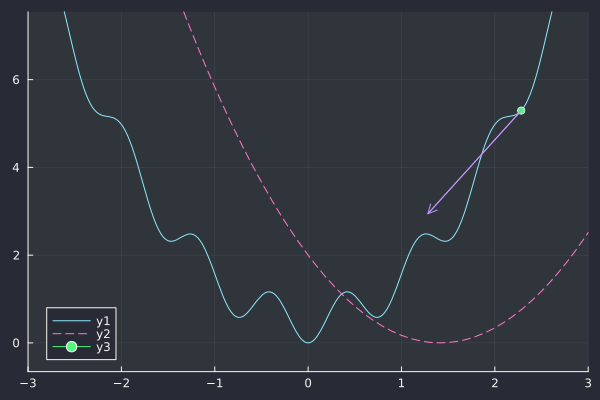

In [8]:
# nested iteration

niters = 80
niterc = 20
γ = 0.0
m = 0.
x = x0
grad_ni = zeros(niters+niterc+1)
loss_ni = zeros(niters+niterc+1)
grad_ni[1] = g(x0)
loss_ni[1] = ℒ(x0)

@gif for i ∈ 2:niters+niterc+1
    if i > niterc
        global m = γ*m - η*g(x + γ*m)
        global x += m
    else
        global m = γ*m - ηc*g_c(x + γ*m)
        global x += m
    end
    grad_ni[i] = g(x) + 1e-16
    loss_ni[i] = ℒ(x) + 1e-16
    plot(ℒ; xlim=xlims, ylim=ylims)
    plot!(ℒ_c; linestyle=:dash)
    plot!((x, ℒ(x)); markershape=:circle)
    quiver!([x], [ℒ(x)], quiver=([-1], [-g(x)]))
end

┌ Info: Saved animation to /var/folders/zv/yhkdrp5x48j5kr2txkz3mbtm002nnd/T/jl_YFAPWrarYZ.gif
└ @ Plots /Users/davarga/.julia/packages/Plots/8ZnR3/src/animation.jl:156


Plots.AnimatedGif("/var/folders/zv/yhkdrp5x48j5kr2txkz3mbtm002nnd/T/jl_YFAPWrarYZ.gif")
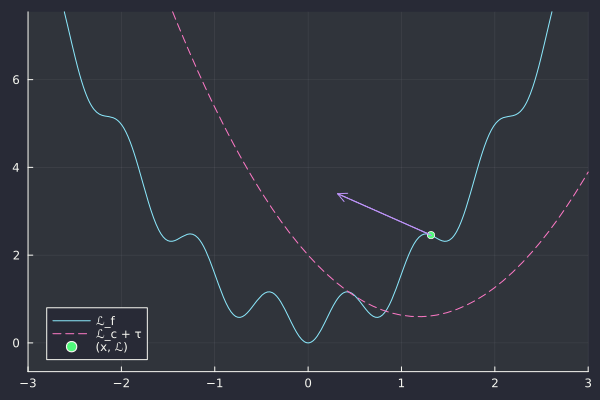

In [ ]:
# mgopt

# play with these parameters:
γ  = 0.0 # coarse-grid correction momentum
τγ = 0.9 # τ correction averaging
tr = 2.0 # trust region radius

niters = 100
m = 0.
mc = 0.
x = x0
grad_mgo = zeros(niters+1)
loss_mgo = zeros(niters+1)
grad_mgo[1] = g(x0)
loss_mgo[1] = ℒ(x0)


# τ = g(x) - g_c(x)
c = 0
τ = 0
x̂ = x0
l̂ = ℒ(x0)

@gif for i ∈ 2:niters+1
    global x
    global m
    global τ

    # fine model
    for _ = 1:1
        x -= η*g(x)
    end

    τ = τγ * τ + (1 - τγ)*(g(x) - g_c(x))

    # coarse model
    xc = x
    for _ = 1:10
        xc -= ηc*(g_c(xc) + τ)

        # trust region
        if abs(xc - x) > tr
            xc = x + sign(xc - x)*tr
            break
        end
    end

    # x = -(τ - 2biasc)/2 # exact solve
    # trust region
    # if abs(xc - x) > tr
    #     xc = x + sign(xc - x)*tr
    # end

    global c = γ*c + xc - x
    x += c

    plot(ℒ; xlim=xlims, ylim=ylims, label="ℒ_f")
    plot!(u -> ℒ_c(u) + u*τ; linestyle=:dash, label="ℒ_c + τ")
    scatter!((x, ℒ(x)); markershape=:circle, label="(x, ℒ)")
    quiver!([x], [ℒ(x)], quiver=([-1], [-g(x)]))

    grad_mgo[i] = g(x) + 1e-16
    loss_mgo[i] = ℒ(x) + 1e-16
end

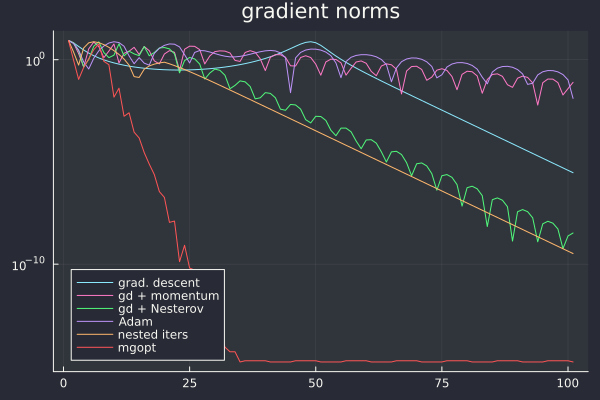

In [82]:
labels = ["grad. descent" "gd + momentum" "gd + Nesterov" "Adam" "nested iters" "mgopt"]
plot([abs.(grad_gd), abs.(grad_gdm), abs.(grad_gdn), abs.(grad_adm), abs.(grad_ni), abs.(grad_mgo)]; 
    yaxis=:log10, label=labels, legend=:bottomleft, title="gradient norms"
)